# Phase 1: Data Preprocessing
## 1. Loading and Initial Exploration

In [1]:
# ایمپورت کتابخانه های لازم - خواندن فایل داده ها توسط پانداز و نمایش چند سطر اول  

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

path = r"C:\Users\mahdis\Desktop\ML"
df = pd.read_csv(path + "\housing.csv")
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


## 1.5 Printing a few details about the dataset

In [11]:
num_samples, num_features = df.shape
print(f'The housing.csv dataset has {num_features} features and {num_samples} samples.\n')
print(f'These features are:\n \n{list(df.keys())}')

The housing.csv dataset has 9 features and 20640 samples.

These features are:
 
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


## cheking for missing values and feature types:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.4 MB


## Statics of df

In [13]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Handling Missing Values

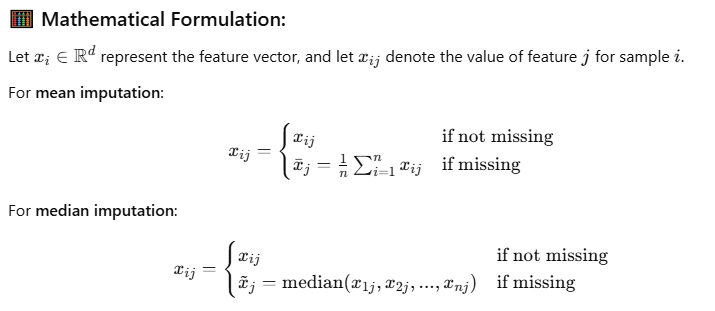

Missing values:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64


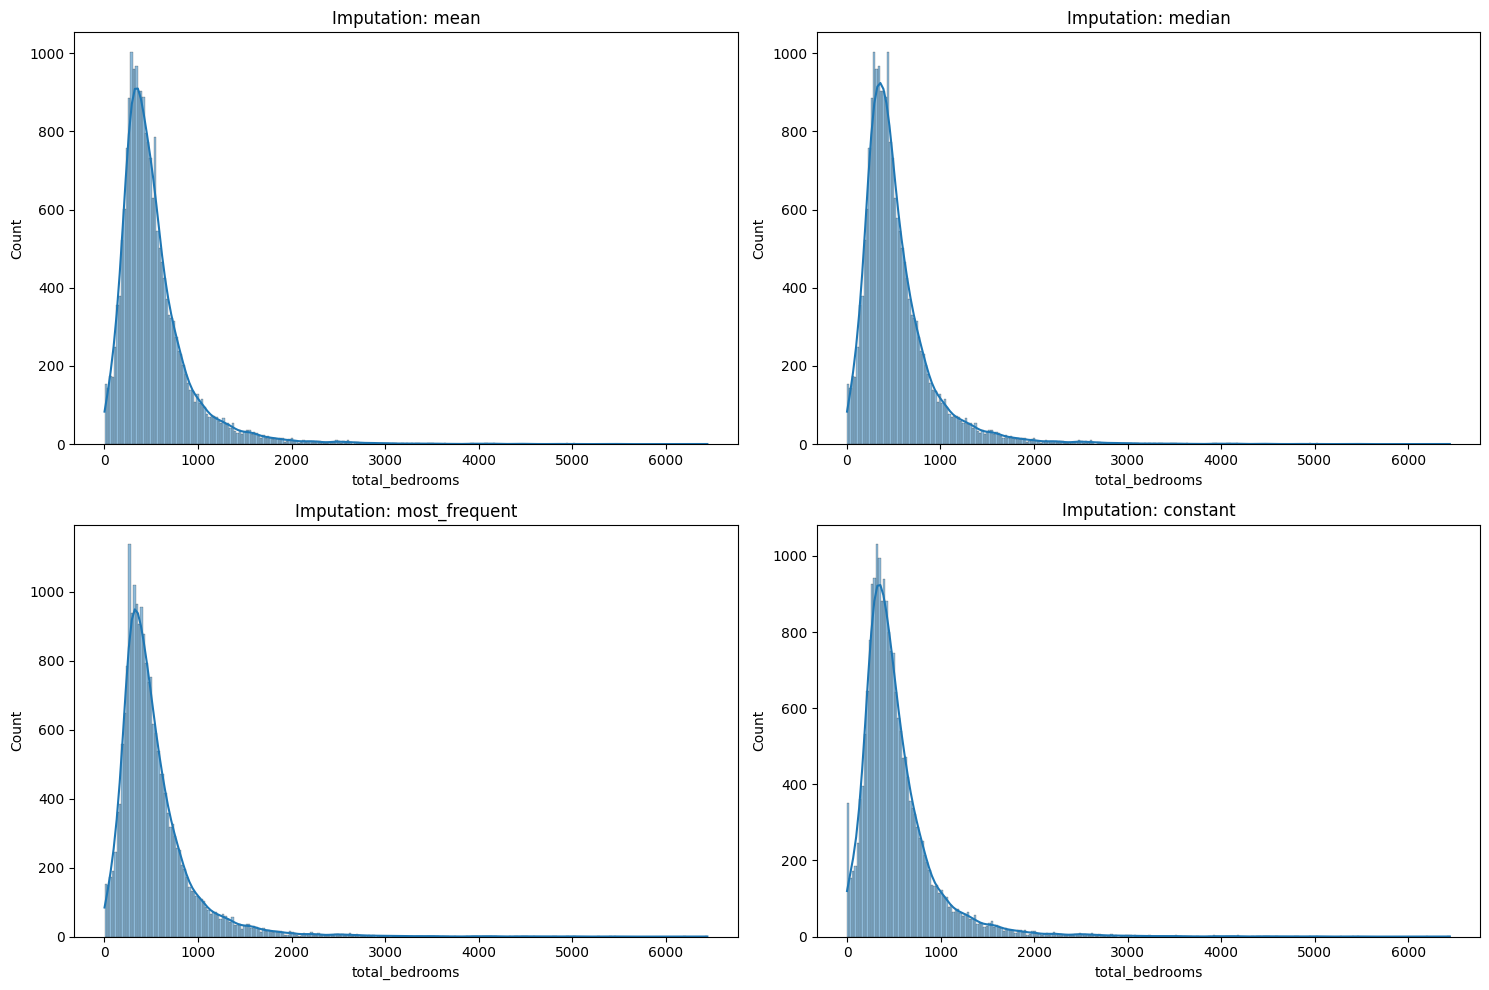

In [14]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Different imputation methods - امتحان میکنیم ببینیم کدوم متد بهتره (تره smooth) 
methods = ['mean', 'median', 'most_frequent', 'constant']

imputed_dfs = {}
for method in methods:
    imputer = SimpleImputer(strategy=method, fill_value=0 if method == 'constant' else None)
    imputed_X = imputer.fit_transform(X)
    imputed_dfs[method] = pd.DataFrame(imputed_X, columns=X.columns)

# Visualization of different imputation methods
plt.figure(figsize=(15, 10))
for i, (method, df_imputed) in enumerate(imputed_dfs.items()):
    plt.subplot(2, 2, i+1)
    sns.histplot(df_imputed['total_bedrooms'], kde=True)
    plt.title(f'Imputation: {method}')
plt.tight_layout()
plt.show()

## 2. Data Splitting

In [15]:
# Split into features (X) and target (y)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Engineering and Normalization

### Why normalize?

Normalization is crucial because:

- Features are on different scales (e.g., latitude vs. total rooms)

- Many algorithms (especially gradient-based ones) perform better with normalized data

- Helps prevent features with larger scales from dominating

### Different scaling methods:

- StandardScaler: (x - mean)/std - good when data is normally distributed

- MinMaxScaler: (x - min)/(max - min) - scales to [0,1] range

- RobustScaler: uses median and IQR - good for outliers

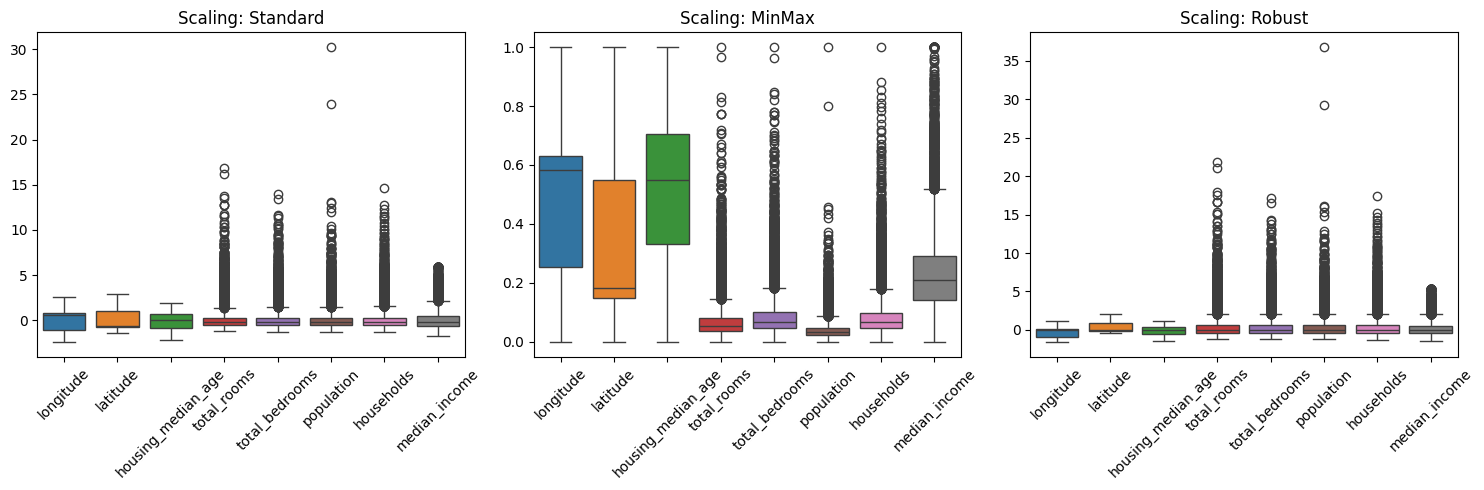

In [16]:
# Apply different scaling methods
scalers = {
    'Standard': StandardScaler(),
    'MinMax': MinMaxScaler(),
    'Robust': RobustScaler()
}

scaled_dfs = {}
for name, scaler in scalers.items():
    scaled_X = scaler.fit_transform(X)
    scaled_dfs[name] = pd.DataFrame(scaled_X, columns=X.columns)

# Visualization
plt.figure(figsize=(15, 5))
for i, (name, df_scaled) in enumerate(scaled_dfs.items()):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df_scaled)
    plt.title(f'Scaling: {name}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# 1. Impute missing values
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# 2. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Phase 2: Linear Regression

### Mathematical Formulation
Linear regression models the relationship between dependent variable (y) and independent variables (X) as:
y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε

Where:

- β₀ is the intercept

- β₁...βₙ are coefficients

- ε is the error term

### Pros:

- Simple and interpretable

- Fast to train

- Works well when relationship is linear

### Cons:

- Poor performance on non-linear relationships

- Sensitive to outliers

- Assumes independence of features

In [19]:
# 3. Train and evaluate
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred = lin_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}, R²: {r2:.2f}")

MSE: 5059656033.13, R²: 0.61


In [22]:
# Error analysis
errors = y_test - y_pred
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Error': errors
})
results_df

,Actual,Predicted,Error
20046,47700,63969.111594,-16269.111594
3024,45800,154577.114574,-108777.114574
15663,500001,253305.714543,246695.285457
20484,218600,263740.266791,-45140.266791
9814,278000,267115.879866,10884.120134
...,...,...,...
15362,263300,207680.928086,55619.071914
16623,266800,252433.008548,14366.991452
18086,500001,439178.196975,60822.803025
2144,72300,130408.852870,-58108.852870


In [29]:
# Ridge Regression (regularized)
ridge = Ridge(alpha=0.7)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
ridg_r2 = r2_score(y_test, y_pred_ridge)

print(f" Ridge MSE: {mse_ridge:.2f}, R²: {ridg_r2:.2f}")

error_ridge = y_test - y_pred_ridge
results_df["y_pred_ridge"] = y_pred_ridge
results_df["error_ridge"] = error_ridge
results_df

 Ridge MSE: 5059300980.06, R²: 0.61


,Actual,Predicted,Error,y_pred_ridge,error_ridge
20046,47700,63969.111594,-16269.111594,63987.166370,-16287.166370
3024,45800,154577.114574,-108777.114574,154599.779838,-108799.779838
15663,500001,253305.714543,246695.285457,253373.822440,246627.177560
20484,218600,263740.266791,-45140.266791,263743.118472,-45143.118472
9814,278000,267115.879866,10884.120134,267080.909265,10919.090735
...,...,...,...,...,...
15362,263300,207680.928086,55619.071914,207689.272183,55610.727817
16623,266800,252433.008548,14366.991452,252374.697834,14425.302166
18086,500001,439178.196975,60822.803025,439166.004077,60834.995923
2144,72300,130408.852870,-58108.852870,130444.142020,-58144.142020


## Scaling y

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

path = r"C:\Users\mahdis\Desktop\ML"
df = pd.read_csv(path + "\housing.csv")
df.head(5)

# Split into features (X) and target (y)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# 1. Impute missing values
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# 2. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

In [44]:
# 3. Train and evaluate
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train_scaled)
y_pred = lin_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
r2 = r2_score(y_test_scaled, y_pred)
print(f"MSE: {mse:.2f}, R²: {r2:.2f}")

MSE: 0.38, R²: 0.61


In [76]:
y_test_scaled = np.ravel(y_test_scaled)
y_pred = np.ravel(y_pred)

# Calculate errors
errors = y_test_scaled - y_pred

# Build the DataFrame
results_df = pd.DataFrame({
    'Actual': y_test_scaled,
    'Predicted': y_pred,
    'Error': errors
})

results_df.head()

,Actual,Predicted,Error
0,-1.379484,-0.866395,-0.513088
1,-1.395917,-0.374294,-1.021623
2,2.532508,0.382344,2.150164
3,0.098645,0.313352,-0.214706
4,0.612401,0.267081,0.345320


# Phase 3: Polynomial Regression
### Mathematical Formulation
Polynomial regression extends linear regression by adding polynomial terms:
y = β₀ + β₁x + β₂x² + ... + βₙxⁿ + ε

### Pros:

- Can capture non-linear relationships

- More flexible than linear regression

- Still a linear model in terms of coefficients

### Cons:

- Can overfit with high degrees

- More computationally expensive

- Requires careful tuning of polynomial degree

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Load dataset
df = pd.read_csv(path + "\housing.csv")
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


##  Correlation Matrix Analysis

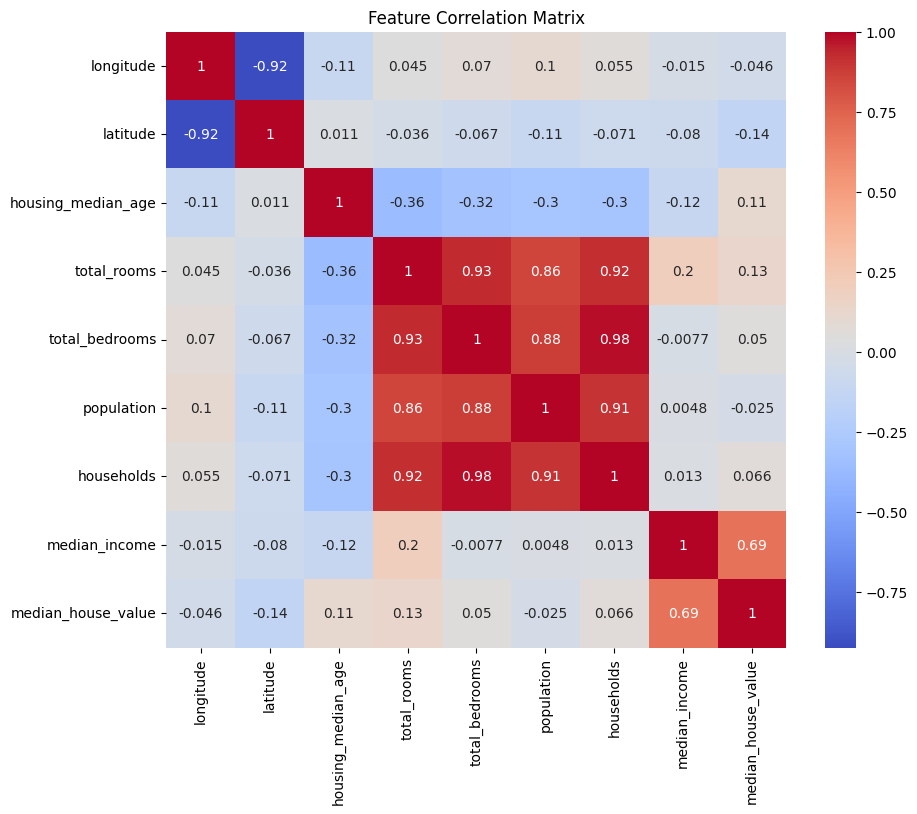

In [34]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [35]:
df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)
df["rooms_per_bedroom"] = df["total_rooms"] / df["total_bedrooms"]
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["people_per_household"] = df["population"] / df["households"]
df.drop(["total_rooms", "total_bedrooms", "population", "latitude", "longitude"], axis=1, inplace=True)
print(df.head())
print(df[["rooms_per_bedroom", "rooms_per_household", "people_per_household"]].isnull().sum())

   housing_median_age  households  median_income  median_house_value  \
0                  41         126         8.3252              452600   
1                  21        1138         8.3014              358500   
2                  52         177         7.2574              352100   
3                  52         219         5.6431              341300   
4                  52         259         3.8462              342200   

   rooms_per_bedroom  rooms_per_household  people_per_household  
0           6.821705             6.984127              2.555556  
1           6.418626             6.238137              2.109842  
2           7.721053             8.288136              2.802260  
3           5.421277             5.817352              2.547945  
4           5.810714             6.281853              2.181467  
rooms_per_bedroom       0
rooms_per_household     0
people_per_household    0
dtype: int64


In [37]:
df.drop(["housing_median_age", "households"], axis=1, inplace=True)
df

,median_income,median_house_value,rooms_per_bedroom,rooms_per_household,people_per_household
0,8.3252,452600,6.821705,6.984127,2.555556
1,8.3014,358500,6.418626,6.238137,2.109842
2,7.2574,352100,7.721053,8.288136,2.802260
3,5.6431,341300,5.421277,5.817352,2.547945
4,3.8462,342200,5.810714,6.281853,2.181467
...,...,...,...,...,...
20635,1.5603,78100,4.451872,5.045455,2.560606
20636,2.5568,77100,4.646667,6.114035,3.122807
20637,1.7000,92300,4.647423,5.205543,2.325635
20638,1.8672,84700,4.547677,5.329513,2.123209


In [38]:
# Split into features (X) and target (y)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# Polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Fit model
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred_poly = model.predict(X_test_poly)

# Evaluate
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"MSE (Polynomial Regression): {mse_poly:.2f}")
print(f"R² (Polynomial Regression): {r2_poly:.4f}")

# Error dataframe
error_poly = y_test.values - y_pred_poly
error_df_poly = pd.DataFrame({
    "y_test": y_test.values,
    "y_pred_poly": y_pred_poly,
    "error_poly": error_poly
})
error_df_poly.head()


MSE (Polynomial Regression): 7142638957.95
R² (Polynomial Regression): 0.4549


,y_test,y_pred_poly,error_poly
0,47700,124154.744267,-76454.744267
1,45800,56756.149213,-10956.149213
2,500001,130139.631904,369861.368096
3,218600,259136.228268,-40536.228268
4,278000,187933.211673,90066.788327


## Scaling y

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Load dataset
df = pd.read_csv(path + "\housing.csv")
df.head(5)

df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)
df["rooms_per_bedroom"] = df["total_rooms"] / df["total_bedrooms"]
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["people_per_household"] = df["population"] / df["households"]
df.drop(["total_rooms", "total_bedrooms", "population", "latitude", "longitude"], axis=1, inplace=True)
print(df.head())
print(df[["rooms_per_bedroom", "rooms_per_household", "people_per_household"]].isnull().sum())

df.drop(["housing_median_age", "households"], axis=1, inplace=True)
# Split into features (X) and target (y)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

   housing_median_age  households  median_income  median_house_value  \
0                  41         126         8.3252              452600   
1                  21        1138         8.3014              358500   
2                  52         177         7.2574              352100   
3                  52         219         5.6431              341300   
4                  52         259         3.8462              342200   

   rooms_per_bedroom  rooms_per_household  people_per_household  
0           6.821705             6.984127              2.555556  
1           6.418626             6.238137              2.109842  
2           7.721053             8.288136              2.802260  
3           5.421277             5.817352              2.547945  
4           5.810714             6.281853              2.181467  
rooms_per_bedroom       0
rooms_per_household     0
people_per_household    0
dtype: int64


In [50]:
# Polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Fit model
model = LinearRegression()
model.fit(X_train_poly, y_train_scaled)
y_pred_poly = model.predict(X_test_poly)

# Evaluate
mse_poly = mean_squared_error(y_test_scaled, y_pred_poly)
r2_poly = r2_score(y_test_scaled, y_pred_poly)
print(f"MSE (Polynomial Regression): {mse_poly:.2f}")
print(f"R² (Polynomial Regression): {r2_poly:.4f}")

MSE (Polynomial Regression): 0.53
R² (Polynomial Regression): 0.4549


In [75]:
# Error dataframe

y_test_scaled = np.ravel(y_test_scaled)
y_pred_poly = np.ravel(y_pred_poly)

error_poly = y_test_scaled - y_pred_poly
error_df_poly = pd.DataFrame({
    "y_test": y_test_scaled,
    "y_pred_poly": y_pred_poly,
    "error_poly": error_poly
})
error_df_poly.head()


,y_test,y_pred_poly,error_poly
0,-1.379484,-0.718220,-0.661264
1,-1.395917,-1.301156,-0.094761
2,2.532508,-0.666456,3.198964
3,0.098645,0.449247,-0.350601
4,0.612401,-0.166594,0.778996


# Phase 4: SGDRegressor with GridSearchCV
### SGDRegressor Explanation
Stochastic Gradient Descent (SGD) is:

- An optimization algorithm that minimizes the loss function

- Processes one training example at a time (or small batches)

- Useful for large datasets

- Can handle L1/L2 regularization

### GridSearchCV Explanation
- cv=5: 5-fold cross-validation

- estimator: The model to tune (SGDRegressor)

- param_grid: Dictionary of hyperparameters to search

- scoring: Metric to optimize (negative MSE here)

### Alpha Parameter
- Alpha is the regularization strength

- Higher values mean more regularization (prevents overfitting)

- Added to control model complexity and improve generalization

In [53]:
path = r"C:\Users\mahdis\Desktop\ML"
df = pd.read_csv(path + "\housing.csv")
df.head(5)

# Split into features (X) and target (y)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# 1. Impute missing values
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# 2. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

In [54]:
from sklearn.linear_model import SGDRegressor

sgd_model = SGDRegressor(
    max_iter=100,
    verbose = 10,
    learning_rate = 'adaptive'
)

In [59]:
from sklearn.model_selection import GridSearchCV

grid_param = {
    'alpha' : np.arange(-1, 2, 0.1)
}

grid_search = GridSearchCV(
    estimator = sgd_model,
    param_grid = grid_param,
    cv=5
)

In [60]:
grid_search.fit(X_train_scaled, y_train_scaled)
best_model = grid_search.best_estimator_

C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 0.84, NNZs: 8, Bias: 0.018532, T: 13209, Avg. loss: 0.224989
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.93, NNZs: 8, Bias: -0.005761, T: 26418, Avg. loss: 0.210480
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.85, NNZs: 8, Bias: -0.003779, T: 39627, Avg. loss: 0.215097
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.88, NNZs: 8, Bias: -0.080303, T: 52836, Avg. loss: 0.215432
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.81, NNZs: 8, Bias: -0.021801, T: 66045, Avg. loss: 0.213687
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 0.89, NNZs: 8, Bias: 0.006118, T: 79254, Avg. loss: 0.208139
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 0.96, NNZs: 8, Bias: -0.046147, T: 92463, Avg. loss: 0.214646
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 0.87, NNZs: 8, Bias: 0.011987, T: 105672, Avg. loss: 0.215171
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 0.85, NNZs: 8, Bias: 0.010082, T: 118881, Avg. loss: 0.224793
Total train

C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

-- Epoch 1
Norm: 0.82, NNZs: 8, Bias: 0.008458, T: 13210, Avg. loss: 0.221320
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.83, NNZs: 8, Bias: -0.019435, T: 26420, Avg. loss: 0.222370
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.83, NNZs: 8, Bias: 0.007850, T: 39630, Avg. loss: 0.229338
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.87, NNZs: 8, Bias: -0.095612, T: 52840, Avg. loss: 0.226162
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.86, NNZs: 8, Bias: -0.031328, T: 66050, Avg. loss: 0.219455
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.88, NNZs: 8, Bias: -0.016300, T: 79260, Avg. loss: 0.224352
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.79, NNZs: 8, Bias: -0.008488, T: 92470, Avg. loss: 0.218916
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.89, NNZs: 8, Bias: 0.019877, T: 105680, Avg. loss: 0.220863
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.91, NNZs: 8, Bias: 0.031446, T: 118890, Avg. loss: 0.219549
Total train

Norm: 0.70, NNZs: 8, Bias: 0.001849, T: 303807, Avg. loss: 0.217609
Total training time: 0.02 seconds.
-- Epoch 24
Norm: 0.70, NNZs: 8, Bias: -0.000034, T: 317016, Avg. loss: 0.217700
Total training time: 0.03 seconds.
-- Epoch 25
Norm: 0.70, NNZs: 8, Bias: -0.000276, T: 330225, Avg. loss: 0.217378
Total training time: 0.03 seconds.
-- Epoch 26
Norm: 0.70, NNZs: 8, Bias: -0.002259, T: 343434, Avg. loss: 0.217207
Total training time: 0.03 seconds.
-- Epoch 27
Norm: 0.70, NNZs: 8, Bias: -0.001419, T: 356643, Avg. loss: 0.217406
Total training time: 0.04 seconds.
-- Epoch 28
Norm: 0.70, NNZs: 8, Bias: -0.000898, T: 369852, Avg. loss: 0.217347
Total training time: 0.04 seconds.
-- Epoch 29
Norm: 0.70, NNZs: 8, Bias: -0.000478, T: 383061, Avg. loss: 0.217279
Total training time: 0.04 seconds.
-- Epoch 30
Norm: 0.70, NNZs: 8, Bias: -0.000187, T: 396270, Avg. loss: 0.217311
Total training time: 0.04 seconds.
-- Epoch 31
Norm: 0.70, NNZs: 8, Bias: -0.000050, T: 409479, Avg. loss: 0.217331
Tota

C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Norm: 0.62, NNZs: 8, Bias: 0.001334, T: 462315, Avg. loss: 0.230783
Total training time: 0.03 seconds.
-- Epoch 36
Norm: 0.62, NNZs: 8, Bias: 0.001330, T: 475524, Avg. loss: 0.230779
Total training time: 0.03 seconds.
-- Epoch 37
Norm: 0.62, NNZs: 8, Bias: 0.001326, T: 488733, Avg. loss: 0.230777
Total training time: 0.03 seconds.
-- Epoch 38
Norm: 0.62, NNZs: 8, Bias: 0.001322, T: 501942, Avg. loss: 0.230784
Total training time: 0.04 seconds.
Convergence after 38 epochs took 0.04 seconds
-- Epoch 1
Norm: 0.65, NNZs: 8, Bias: 0.006486, T: 13210, Avg. loss: 0.244662
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 8, Bias: 0.010007, T: 26420, Avg. loss: 0.243930
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.50, NNZs: 8, Bias: -0.083859, T: 39630, Avg. loss: 0.255728
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.66, NNZs: 8, Bias: 0.075477, T: 52840, Avg. loss: 0.243128
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.69, NNZs: 8, Bias: 0.086012, T: 66

C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

-- Epoch 1
Norm: 0.54, NNZs: 8, Bias: -0.055312, T: 13210, Avg. loss: 0.254534
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.64, NNZs: 8, Bias: 0.031068, T: 26420, Avg. loss: 0.253292
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.53, NNZs: 8, Bias: -0.052273, T: 39630, Avg. loss: 0.254956
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.59, NNZs: 8, Bias: 0.006238, T: 52840, Avg. loss: 0.255334
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.50, NNZs: 8, Bias: -0.039613, T: 66050, Avg. loss: 0.254846
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.63, NNZs: 8, Bias: -0.014620, T: 79260, Avg. loss: 0.253241
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.63, NNZs: 8, Bias: 0.013939, T: 92470, Avg. loss: 0.253022
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.53, NNZs: 8, Bias: -0.012339, T: 105680, Avg. loss: 0.242455
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.56, NNZs: 8, Bias: 0.018225, T: 118890, Avg. loss: 0.243350
Total train

Norm: 0.51, NNZs: 8, Bias: -0.002596, T: 475524, Avg. loss: 0.251259
Total training time: 0.06 seconds.
-- Epoch 37
Norm: 0.51, NNZs: 8, Bias: -0.002595, T: 488733, Avg. loss: 0.251262
Total training time: 0.06 seconds.
-- Epoch 38
Norm: 0.51, NNZs: 8, Bias: -0.002595, T: 501942, Avg. loss: 0.251265
Total training time: 0.07 seconds.
-- Epoch 39
Norm: 0.51, NNZs: 8, Bias: -0.002595, T: 515151, Avg. loss: 0.251265
Total training time: 0.07 seconds.
-- Epoch 40
Norm: 0.51, NNZs: 8, Bias: -0.002595, T: 528360, Avg. loss: 0.251256
Total training time: 0.07 seconds.
Convergence after 40 epochs took 0.07 seconds
-- Epoch 1
Norm: 0.50, NNZs: 8, Bias: -0.085207, T: 13209, Avg. loss: 0.266022
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.52, NNZs: 8, Bias: 0.049052, T: 26418, Avg. loss: 0.267538
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.54, NNZs: 8, Bias: -0.047430, T: 39627, Avg. loss: 0.265480
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.58, NNZs: 8, Bias: 0.00458

C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Norm: 0.51, NNZs: 8, Bias: 0.009414, T: 105672, Avg. loss: 0.262714
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 0.49, NNZs: 8, Bias: 0.031983, T: 118881, Avg. loss: 0.262970
Total training time: 0.02 seconds.
-- Epoch 10
Norm: 0.48, NNZs: 8, Bias: 0.016934, T: 132090, Avg. loss: 0.263157
Total training time: 0.02 seconds.
-- Epoch 11
Norm: 0.49, NNZs: 8, Bias: 0.051507, T: 145299, Avg. loss: 0.263375
Total training time: 0.02 seconds.
-- Epoch 12
Norm: 0.46, NNZs: 8, Bias: -0.025947, T: 158508, Avg. loss: 0.262835
Total training time: 0.02 seconds.
-- Epoch 13
Norm: 0.48, NNZs: 8, Bias: 0.002553, T: 171717, Avg. loss: 0.262418
Total training time: 0.03 seconds.
-- Epoch 14
Norm: 0.48, NNZs: 8, Bias: -0.001001, T: 184926, Avg. loss: 0.261712
Total training time: 0.03 seconds.
-- Epoch 15
Norm: 0.48, NNZs: 8, Bias: 0.001532, T: 198135, Avg. loss: 0.261702
Total training time: 0.03 seconds.
-- Epoch 16
Norm: 0.48, NNZs: 8, Bias: 0.001694, T: 211344, Avg. loss: 0.261517
Total train

C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Norm: 0.44, NNZs: 8, Bias: -0.003479, T: 250971, Avg. loss: 0.270790
Total training time: 0.03 seconds.
-- Epoch 20
Norm: 0.44, NNZs: 8, Bias: -0.010902, T: 264180, Avg. loss: 0.270982
Total training time: 0.03 seconds.
-- Epoch 21
Norm: 0.44, NNZs: 8, Bias: -0.006772, T: 277389, Avg. loss: 0.270853
Total training time: 0.03 seconds.
-- Epoch 22
Norm: 0.44, NNZs: 8, Bias: -0.003210, T: 290598, Avg. loss: 0.271087
Total training time: 0.04 seconds.
-- Epoch 23
Norm: 0.44, NNZs: 8, Bias: -0.005010, T: 303807, Avg. loss: 0.270120
Total training time: 0.04 seconds.
-- Epoch 24
Norm: 0.44, NNZs: 8, Bias: -0.004198, T: 317016, Avg. loss: 0.270631
Total training time: 0.04 seconds.
-- Epoch 25
Norm: 0.44, NNZs: 8, Bias: -0.001663, T: 330225, Avg. loss: 0.270806
Total training time: 0.04 seconds.
-- Epoch 26
Norm: 0.44, NNZs: 8, Bias: -0.001879, T: 343434, Avg. loss: 0.269937
Total training time: 0.04 seconds.
-- Epoch 27
Norm: 0.44, NNZs: 8, Bias: -0.002124, T: 356643, Avg. loss: 0.270168
Tot

C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Norm: 0.44, NNZs: 8, Bias: -0.001386, T: 488770, Avg. loss: 0.270163
Total training time: 0.05 seconds.
-- Epoch 38
Norm: 0.44, NNZs: 8, Bias: -0.001381, T: 501980, Avg. loss: 0.270161
Total training time: 0.05 seconds.
-- Epoch 39
Norm: 0.44, NNZs: 8, Bias: -0.001376, T: 515190, Avg. loss: 0.270158
Total training time: 0.05 seconds.
-- Epoch 40
Norm: 0.44, NNZs: 8, Bias: -0.001371, T: 528400, Avg. loss: 0.270151
Total training time: 0.05 seconds.
-- Epoch 41
Norm: 0.44, NNZs: 8, Bias: -0.001367, T: 541610, Avg. loss: 0.270151
Total training time: 0.05 seconds.
Convergence after 41 epochs took 0.05 seconds
-- Epoch 1
Norm: 0.45, NNZs: 8, Bias: -0.026490, T: 13209, Avg. loss: 0.290944
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.47, NNZs: 8, Bias: -0.007008, T: 26418, Avg. loss: 0.290714
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.41, NNZs: 8, Bias: 0.000602, T: 39627, Avg. loss: 0.290185
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.48, NNZs: 8, Bias: -0.0026

C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Norm: 0.42, NNZs: 8, Bias: -0.000776, T: 488770, Avg. loss: 0.278779
Total training time: 0.05 seconds.
-- Epoch 38
Norm: 0.42, NNZs: 8, Bias: -0.000777, T: 501980, Avg. loss: 0.278783
Total training time: 0.05 seconds.
Convergence after 38 epochs took 0.05 seconds
-- Epoch 1
Norm: 0.39, NNZs: 8, Bias: 0.014087, T: 13209, Avg. loss: 0.299194
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.45, NNZs: 8, Bias: 0.085810, T: 26418, Avg. loss: 0.298049
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.44, NNZs: 8, Bias: 0.020050, T: 39627, Avg. loss: 0.298612
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.42, NNZs: 8, Bias: -0.015855, T: 52836, Avg. loss: 0.297865
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.45, NNZs: 8, Bias: 0.074872, T: 66045, Avg. loss: 0.299208
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.40, NNZs: 8, Bias: -0.048561, T: 79254, Avg. loss: 0.297332
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.42, NNZs: 8, Bias: -0.034113, T: 92

C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Norm: 0.40, NNZs: 8, Bias: -0.000832, T: 290620, Avg. loss: 0.287588
Total training time: 0.02 seconds.
-- Epoch 23
Norm: 0.39, NNZs: 8, Bias: -0.003000, T: 303830, Avg. loss: 0.286657
Total training time: 0.02 seconds.
-- Epoch 24
Norm: 0.39, NNZs: 8, Bias: -0.002632, T: 317040, Avg. loss: 0.286945
Total training time: 0.02 seconds.
-- Epoch 25
Norm: 0.39, NNZs: 8, Bias: -0.002200, T: 330250, Avg. loss: 0.287242
Total training time: 0.03 seconds.
-- Epoch 26
Norm: 0.39, NNZs: 8, Bias: -0.002003, T: 343460, Avg. loss: 0.287199
Total training time: 0.03 seconds.
-- Epoch 27
Norm: 0.39, NNZs: 8, Bias: -0.001708, T: 356670, Avg. loss: 0.287082
Total training time: 0.03 seconds.
-- Epoch 28
Norm: 0.39, NNZs: 8, Bias: -0.001667, T: 369880, Avg. loss: 0.286964
Total training time: 0.03 seconds.
-- Epoch 29
Norm: 0.39, NNZs: 8, Bias: -0.001634, T: 383090, Avg. loss: 0.286978
Total training time: 0.03 seconds.
-- Epoch 30
Norm: 0.39, NNZs: 8, Bias: -0.001607, T: 396300, Avg. loss: 0.286991
Tot

C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Norm: 0.37, NNZs: 8, Bias: -0.001005, T: 475560, Avg. loss: 0.294765
Total training time: 0.03 seconds.
-- Epoch 37
Norm: 0.37, NNZs: 8, Bias: -0.001005, T: 488770, Avg. loss: 0.294762
Total training time: 0.03 seconds.
-- Epoch 38
Norm: 0.37, NNZs: 8, Bias: -0.001004, T: 501980, Avg. loss: 0.294769
Total training time: 0.03 seconds.
-- Epoch 39
Norm: 0.37, NNZs: 8, Bias: -0.001004, T: 515190, Avg. loss: 0.294759
Total training time: 0.04 seconds.
-- Epoch 40
Norm: 0.37, NNZs: 8, Bias: -0.001003, T: 528400, Avg. loss: 0.294762
Total training time: 0.04 seconds.
Convergence after 40 epochs took 0.04 seconds
-- Epoch 1
Norm: 0.30, NNZs: 8, Bias: -0.087932, T: 13209, Avg. loss: 0.314676
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.38, NNZs: 8, Bias: -0.037273, T: 26418, Avg. loss: 0.314354
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.33, NNZs: 8, Bias: 0.061047, T: 39627, Avg. loss: 0.312566
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.27, NNZs: 8, Bias: -0.0844

C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Norm: 0.40, NNZs: 8, Bias: 0.108186, T: 66045, Avg. loss: 0.320288
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 0.37, NNZs: 8, Bias: 0.016361, T: 79254, Avg. loss: 0.318357
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 0.36, NNZs: 8, Bias: 0.091520, T: 92463, Avg. loss: 0.320131
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 0.33, NNZs: 8, Bias: 0.004084, T: 105672, Avg. loss: 0.310325
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 0.36, NNZs: 8, Bias: 0.008380, T: 118881, Avg. loss: 0.310812
Total training time: 0.02 seconds.
-- Epoch 10
Norm: 0.37, NNZs: 8, Bias: 0.036767, T: 132090, Avg. loss: 0.310500
Total training time: 0.02 seconds.
-- Epoch 11
Norm: 0.36, NNZs: 8, Bias: 0.020694, T: 145299, Avg. loss: 0.309986
Total training time: 0.02 seconds.
-- Epoch 12
Norm: 0.36, NNZs: 8, Bias: 0.021696, T: 158508, Avg. loss: 0.310152
Total training time: 0.02 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 8, Bias: -0.033756, T: 171717, Avg. loss: 0.309310
Total training tim

C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

-- Epoch 1
Norm: 0.34, NNZs: 8, Bias: -0.005542, T: 13209, Avg. loss: 0.325558
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.31, NNZs: 8, Bias: -0.010766, T: 26418, Avg. loss: 0.324919
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.37, NNZs: 8, Bias: 0.020493, T: 39627, Avg. loss: 0.327728
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.27, NNZs: 8, Bias: -0.048133, T: 52836, Avg. loss: 0.324831
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.35, NNZs: 8, Bias: -0.051276, T: 66045, Avg. loss: 0.325063
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.34, NNZs: 8, Bias: -0.042524, T: 79254, Avg. loss: 0.324034
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.33, NNZs: 8, Bias: -0.009490, T: 92463, Avg. loss: 0.316190
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.31, NNZs: 8, Bias: -0.002550, T: 105672, Avg. loss: 0.316135
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.33, NNZs: 8, Bias: 0.012162, T: 118881, Avg. loss: 0.316442
Total tra

Norm: 0.32, NNZs: 8, Bias: -0.001195, T: 475560, Avg. loss: 0.314766
Total training time: 0.05 seconds.
-- Epoch 37
Norm: 0.32, NNZs: 8, Bias: -0.001185, T: 488770, Avg. loss: 0.314726
Total training time: 0.05 seconds.
-- Epoch 38
Norm: 0.32, NNZs: 8, Bias: -0.001184, T: 501980, Avg. loss: 0.314702
Total training time: 0.05 seconds.
-- Epoch 39
Norm: 0.32, NNZs: 8, Bias: -0.001182, T: 515190, Avg. loss: 0.314716
Total training time: 0.05 seconds.
-- Epoch 40
Norm: 0.32, NNZs: 8, Bias: -0.001181, T: 528400, Avg. loss: 0.314717
Total training time: 0.05 seconds.
-- Epoch 41
Norm: 0.32, NNZs: 8, Bias: -0.001179, T: 541610, Avg. loss: 0.314702
Total training time: 0.05 seconds.
-- Epoch 42
Norm: 0.32, NNZs: 8, Bias: -0.001177, T: 554820, Avg. loss: 0.314705
Total training time: 0.05 seconds.
Convergence after 42 epochs took 0.05 seconds
-- Epoch 1
Norm: 0.36, NNZs: 8, Bias: 0.014981, T: 13209, Avg. loss: 0.332468
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.31, NNZs: 8, Bias: 0.0

C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Norm: 0.31, NNZs: 8, Bias: -0.001371, T: 409510, Avg. loss: 0.320703
Total training time: 0.03 seconds.
-- Epoch 32
Norm: 0.31, NNZs: 8, Bias: -0.001352, T: 422720, Avg. loss: 0.320667
Total training time: 0.03 seconds.
-- Epoch 33
Norm: 0.31, NNZs: 8, Bias: -0.001339, T: 435930, Avg. loss: 0.320658
Total training time: 0.03 seconds.
-- Epoch 34
Norm: 0.31, NNZs: 8, Bias: -0.001337, T: 449140, Avg. loss: 0.320664
Total training time: 0.03 seconds.
-- Epoch 35
Norm: 0.31, NNZs: 8, Bias: -0.001334, T: 462350, Avg. loss: 0.320684
Total training time: 0.03 seconds.
-- Epoch 36
Norm: 0.31, NNZs: 8, Bias: -0.001331, T: 475560, Avg. loss: 0.320696
Total training time: 0.03 seconds.
-- Epoch 37
Norm: 0.31, NNZs: 8, Bias: -0.001329, T: 488770, Avg. loss: 0.320695
Total training time: 0.03 seconds.
-- Epoch 38
Norm: 0.31, NNZs: 8, Bias: -0.001326, T: 501980, Avg. loss: 0.320700
Total training time: 0.03 seconds.
Convergence after 38 epochs took 0.03 seconds
-- Epoch 1
Norm: 0.35, NNZs: 8, Bias: 

C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Norm: 0.30, NNZs: 8, Bias: 0.004410, T: 237780, Avg. loss: 0.327412
Total training time: 0.03 seconds.
-- Epoch 19
Norm: 0.29, NNZs: 8, Bias: 0.019071, T: 250990, Avg. loss: 0.325945
Total training time: 0.03 seconds.
-- Epoch 20
Norm: 0.29, NNZs: 8, Bias: -0.010013, T: 264200, Avg. loss: 0.326840
Total training time: 0.03 seconds.
-- Epoch 21
Norm: 0.29, NNZs: 8, Bias: -0.020796, T: 277410, Avg. loss: 0.326874
Total training time: 0.03 seconds.
-- Epoch 22
Norm: 0.29, NNZs: 8, Bias: -0.009493, T: 290620, Avg. loss: 0.326226
Total training time: 0.03 seconds.
-- Epoch 23
Norm: 0.30, NNZs: 8, Bias: -0.003999, T: 303830, Avg. loss: 0.327189
Total training time: 0.03 seconds.
-- Epoch 24
Norm: 0.29, NNZs: 8, Bias: -0.003940, T: 317040, Avg. loss: 0.325622
Total training time: 0.03 seconds.
-- Epoch 25
Norm: 0.30, NNZs: 8, Bias: -0.000388, T: 330250, Avg. loss: 0.327380
Total training time: 0.03 seconds.
-- Epoch 26
Norm: 0.30, NNZs: 8, Bias: 0.002602, T: 343460, Avg. loss: 0.326340
Total 

C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Norm: 0.28, NNZs: 8, Bias: 0.005013, T: 317040, Avg. loss: 0.334463
Total training time: 0.03 seconds.
-- Epoch 25
Norm: 0.28, NNZs: 8, Bias: 0.004298, T: 330250, Avg. loss: 0.334506
Total training time: 0.03 seconds.
-- Epoch 26
Norm: 0.29, NNZs: 8, Bias: 0.006295, T: 343460, Avg. loss: 0.335112
Total training time: 0.03 seconds.
-- Epoch 27
Norm: 0.28, NNZs: 8, Bias: 0.003755, T: 356670, Avg. loss: 0.333844
Total training time: 0.03 seconds.
-- Epoch 28
Norm: 0.28, NNZs: 8, Bias: 0.003962, T: 369880, Avg. loss: 0.334377
Total training time: 0.03 seconds.
-- Epoch 29
Norm: 0.28, NNZs: 8, Bias: 0.004130, T: 383090, Avg. loss: 0.334502
Total training time: 0.03 seconds.
-- Epoch 30
Norm: 0.28, NNZs: 8, Bias: 0.004171, T: 396300, Avg. loss: 0.334274
Total training time: 0.03 seconds.
-- Epoch 31
Norm: 0.28, NNZs: 8, Bias: 0.004336, T: 409510, Avg. loss: 0.334182
Total training time: 0.04 seconds.
-- Epoch 32
Norm: 0.28, NNZs: 8, Bias: 0.004399, T: 422720, Avg. loss: 0.334314
Total traini

C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Norm: 0.31, NNZs: 8, Bias: 0.063606, T: 158520, Avg. loss: 0.341174
Total training time: 0.02 seconds.
-- Epoch 13
Norm: 0.28, NNZs: 8, Bias: 0.007896, T: 171730, Avg. loss: 0.339214
Total training time: 0.02 seconds.
-- Epoch 14
Norm: 0.27, NNZs: 8, Bias: -0.002992, T: 184940, Avg. loss: 0.339316
Total training time: 0.02 seconds.
-- Epoch 15
Norm: 0.28, NNZs: 8, Bias: -0.006664, T: 198150, Avg. loss: 0.340070
Total training time: 0.02 seconds.
-- Epoch 16
Norm: 0.27, NNZs: 8, Bias: 0.017707, T: 211360, Avg. loss: 0.339625
Total training time: 0.02 seconds.
-- Epoch 17
Norm: 0.26, NNZs: 8, Bias: 0.000835, T: 224570, Avg. loss: 0.339450
Total training time: 0.02 seconds.
-- Epoch 18
Norm: 0.28, NNZs: 8, Bias: 0.016936, T: 237780, Avg. loss: 0.340262
Total training time: 0.02 seconds.
-- Epoch 19
Norm: 0.27, NNZs: 8, Bias: 0.010107, T: 250990, Avg. loss: 0.338058
Total training time: 0.03 seconds.
-- Epoch 20
Norm: 0.27, NNZs: 8, Bias: 0.005089, T: 264200, Avg. loss: 0.338668
Total trai

C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Norm: 0.26, NNZs: 8, Bias: -0.001195, T: 290620, Avg. loss: 0.342313
Total training time: 0.03 seconds.
-- Epoch 23
Norm: 0.27, NNZs: 8, Bias: -0.001845, T: 303830, Avg. loss: 0.342632
Total training time: 0.03 seconds.
-- Epoch 24
Norm: 0.27, NNZs: 8, Bias: -0.001564, T: 317040, Avg. loss: 0.340312
Total training time: 0.03 seconds.
-- Epoch 25
Norm: 0.26, NNZs: 8, Bias: -0.001318, T: 330250, Avg. loss: 0.340860
Total training time: 0.03 seconds.
-- Epoch 26
Norm: 0.26, NNZs: 8, Bias: -0.001209, T: 343460, Avg. loss: 0.341410
Total training time: 0.03 seconds.
-- Epoch 27
Norm: 0.26, NNZs: 8, Bias: -0.001152, T: 356670, Avg. loss: 0.341875
Total training time: 0.03 seconds.
-- Epoch 28
Norm: 0.26, NNZs: 8, Bias: -0.001091, T: 369880, Avg. loss: 0.341912
Total training time: 0.03 seconds.
-- Epoch 29
Norm: 0.26, NNZs: 8, Bias: -0.000951, T: 383090, Avg. loss: 0.341758
Total training time: 0.03 seconds.
-- Epoch 30
Norm: 0.26, NNZs: 8, Bias: -0.000940, T: 396300, Avg. loss: 0.341852
Tot

C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Norm: 0.25, NNZs: 8, Bias: 0.000250, T: 475524, Avg. loss: 0.349024
Total training time: 0.03 seconds.
-- Epoch 37
Norm: 0.25, NNZs: 8, Bias: 0.000248, T: 488733, Avg. loss: 0.349010
Total training time: 0.03 seconds.
-- Epoch 38
Norm: 0.25, NNZs: 8, Bias: 0.000247, T: 501942, Avg. loss: 0.349049
Total training time: 0.04 seconds.
-- Epoch 39
Norm: 0.25, NNZs: 8, Bias: 0.000245, T: 515151, Avg. loss: 0.349020
Total training time: 0.04 seconds.
-- Epoch 40
Norm: 0.25, NNZs: 8, Bias: 0.000243, T: 528360, Avg. loss: 0.349034
Total training time: 0.04 seconds.
Convergence after 40 epochs took 0.04 seconds
-- Epoch 1
Norm: 0.34, NNZs: 8, Bias: 0.057860, T: 13210, Avg. loss: 0.358634
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.26, NNZs: 8, Bias: 0.032029, T: 26420, Avg. loss: 0.357513
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.27, NNZs: 8, Bias: -0.010823, T: 39630, Avg. loss: 0.363824
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.21, NNZs: 8, Bias: -0.035930, T:

-- Epoch 1
Norm: 0.85, NNZs: 8, Bias: 0.034459, T: 16512, Avg. loss: 0.219474
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.87, NNZs: 8, Bias: -0.057501, T: 33024, Avg. loss: 0.216428
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.82, NNZs: 8, Bias: 0.010432, T: 49536, Avg. loss: 0.214977
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.93, NNZs: 8, Bias: 0.017232, T: 66048, Avg. loss: 0.223971
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.87, NNZs: 8, Bias: 0.009813, T: 82560, Avg. loss: 0.223237
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.87, NNZs: 8, Bias: 0.029319, T: 99072, Avg. loss: 0.217280
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.87, NNZs: 8, Bias: 0.077441, T: 115584, Avg. loss: 0.214160
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.86, NNZs: 8, Bias: 0.043996, T: 132096, Avg. loss: 0.215602
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.86, NNZs: 8, Bias: 0.009551, T: 148608, Avg. loss: 0.202881
Total training

C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
55 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\mahdis\anaconda3\lib\site-pack

In [62]:
# Best parameters
print("Best parameters:", grid_search.best_params_)


Best parameters: {'alpha': 0.09999999999999964}


In [66]:
# Evaluate best model
best_sgd = grid_search.best_estimator_
y_pred_sgd = best_sgd.predict(X_test_scaled)
mse_sgd = mean_squared_error(y_test_scaled, y_pred_sgd)
r2_sgd = r2_score(y_test_scaled, y_pred_sgd)
print(f"SGDRegressor MSE: {mse_sgd:.2f}")
print(f"SGDRegressor R2: {r2_sgd:.4f}")

SGDRegressor MSE: 0.41
SGDRegressor R2: 0.5844


## plotting losses:

C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warning

C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warning

C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\mahdis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

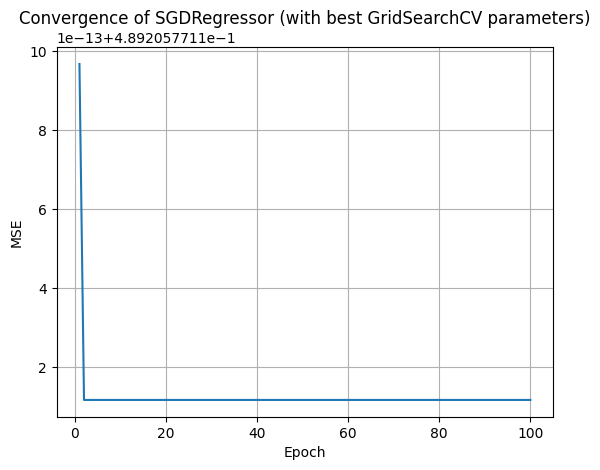

In [71]:
best_params = grid_search.best_params_

# بازآموزی مدل با warm_start و max_iter=1 در هر epoch
sgd_model = SGDRegressor(
    max_iter=1,
    warm_start=True,
    learning_rate='adaptive',
    alpha=best_params['alpha'],
    random_state=42
)

losses = []
for i in range(100):
    sgd_model.fit(X_train_scaled, y_train_scaled)
    y_pred = sgd_model.predict(X_test_scaled)
    loss = mean_squared_error(y_test_scaled, y_pred)
    losses.append(loss)

plt.plot(range(1, 101), losses)
plt.title('Convergence of SGDRegressor (with best GridSearchCV parameters)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

In [74]:
# Error dataframe

y_test_scaled = np.ravel(y_test_scaled)
y_pred_sgd = np.ravel(y_pred_sgd)

error_sgd = y_test_scaled - y_pred_sgd
error_df_sgd = pd.DataFrame({
    "y_test": y_test_scaled,
    "y_pred_sgd": y_pred_sgd,
    "error_sgd": error_sgd
})
error_df_sgd.head()

,y_test,y_pred_sgd,error_sgd
0,-1.379484,-0.993585,-0.385899
1,-1.395917,-0.390553,-1.005363
2,2.532508,0.405465,2.127042
3,0.098645,0.454799,-0.356153
4,0.612401,0.226070,0.386331
